### Import Library

In [52]:
import numpy as np
import os
import cv2
import random
import matplotlib.pyplot as plt
from tensorflow.keras.utils import to_categorical
from keras.models import Sequential
from sklearn.preprocessing import LabelEncoder
from keras.layers import Dense, Flatten, Dense, AveragePooling2D
from keras.layers import Conv2D

### Read Data

In [53]:
img_size = 124
train_data = []
val_data = []
test_data = []
directory = "Data/flowers"
for sub_directory in os.listdir(directory):
    count = 0
    inner_directory = os.path.join(directory,sub_directory)
    test_limit = int(0.85*(len(os.listdir(inner_directory))))
    val_limit = int(0.8*test_limit)
    for i in os.listdir(inner_directory):
        try:
            count += 1
            img = cv2.imread(os.path.join(inner_directory,i),1)
            img = cv2.resize(img,(img_size,img_size))
            if count < val_limit:
                train_data.append([img,sub_directory])
            elif val_limit <= count < test_limit:
                val_data.append([img,sub_directory])
            else:
                test_data.append([img,sub_directory])
        except:
            pass

### Shuffle Data

In [54]:
random.shuffle(train_data)
random.shuffle(val_data)
random.shuffle(test_data)

### Split Train, Val, and Test

In [55]:
train_X = []
train_Y = []
for features,label in train_data:
    train_X.append(features)
    train_Y.append(label)

val_X = []
val_Y = []
for features,label in val_data:
    val_X.append(features)
    val_Y.append(label)

test_X = []
test_Y = []
for features,label in test_data:
    test_X.append(features)
    test_Y.append(label)

### Reshape

In [56]:
train_X = np.array(train_X)/255.0
train_X = train_X.reshape(-1,124,124,3)
train_Y = np.array(train_Y)

val_X = np.array(val_X)/255.0
val_X = val_X.reshape(-1,124,124,3)
val_Y = np.array(val_Y)

test_X = np.array(test_X)/255.0
test_X = test_X.reshape(-1,124,124,3)
test_Y = np.array(test_Y)

### Check Shape

In [57]:
train_X.shape

(2927, 124, 124, 3)

### Check Image

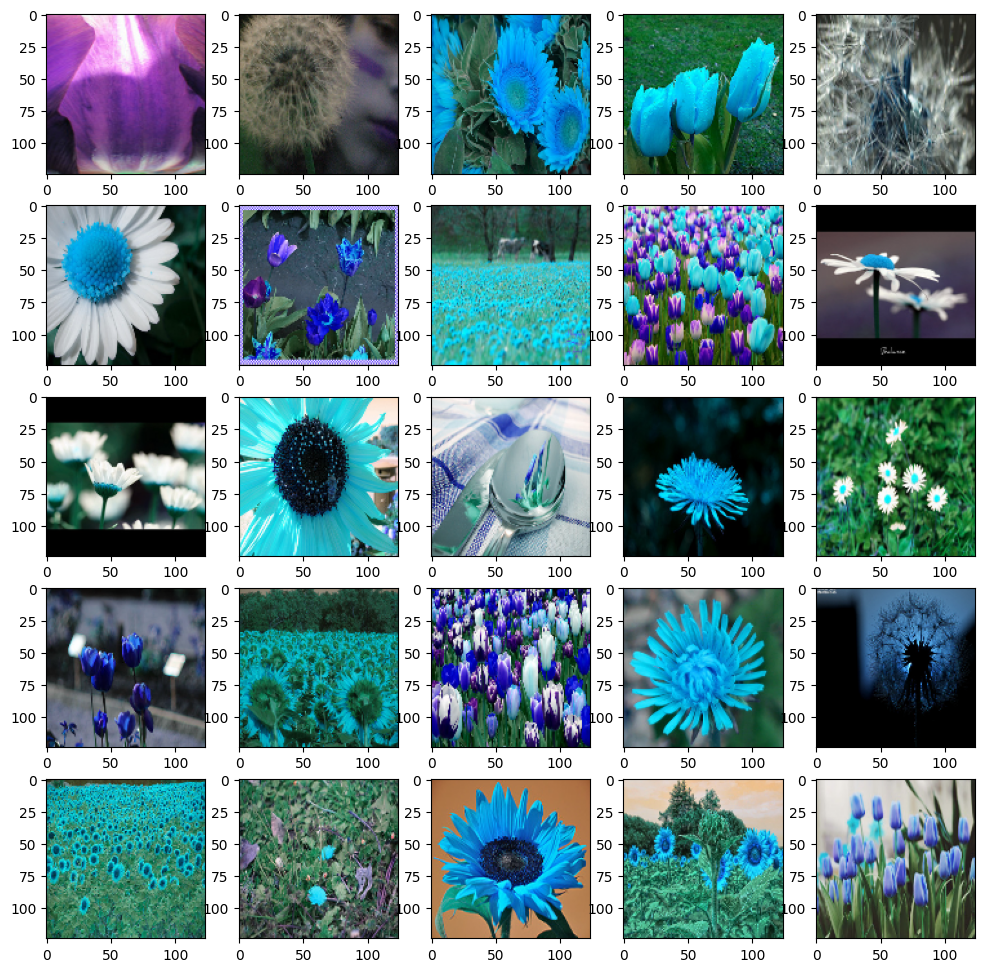

In [58]:
w=10
h=10
fig=plt.figure(figsize=(12,12))
columns = 5
rows = 5

for i in range(1, columns*rows +1):
    img = train_X[i]
    fig.add_subplot(rows, columns, i)
    plt.imshow(np.squeeze(img))
    
plt.show()

### Encoder Label

In [59]:
LE = LabelEncoder()
train_Y = LE.fit_transform(train_Y)
test_Y = LE.fit_transform(test_Y)
val_Y = LE.fit_transform(val_Y)
train_Y = to_categorical(train_Y)
test_Y = to_categorical(test_Y)
val_Y = to_categorical(val_Y)

### Model - LeNet-5

In [60]:
model_LeNet = Sequential()
model_LeNet.add(Conv2D(6, kernel_size = (5, 5), strides = 1, activation ='tanh',
                    input_shape = (124, 124, 3), padding = 'same'))
model_LeNet.add(AveragePooling2D(pool_size = (2, 2)))
model_LeNet.add(Conv2D(16, kernel_size = (5, 5), strides = 1,
                    activation = 'tanh', padding = 'valid'))
model_LeNet.add(AveragePooling2D(pool_size = (2, 2)))
model_LeNet.add(Conv2D(120, kernel_size = (5, 5), activation = 'tanh'))
model_LeNet.add(Flatten())
model_LeNet.add(Dense(84, activation = 'tanh'))
model_LeNet.add(Dense(5, activation = 'softmax')) #change to class

c:\Users\JOHAN\anaconda3\envs\johan\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


### Check Model

In [61]:
model_LeNet.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_3 (Conv2D)               │ (None, 124, 124, 6)    │           456 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ average_pooling2d_2             │ (None, 62, 62, 6)      │             0 │
│ (AveragePooling2D)              │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_4 (Conv2D)               │ (None, 58, 58, 16)     │         2,416 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ average_pooling2d_3             │ (None, 29, 29, 16)     │             0 │
│ (AveragePooling2D)              │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_5 (Conv2D)               │ (None, 25, 25, 120)    │        48,120 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_1 (Flatten)             │ (None, 75000)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 84)             │     6,300,084 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 5)              │           425 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 6,351,501 (24.23 MB)

 Trainable params: 6,351,501 (24.23 MB)

 Non-trainable params: 0 (0.00 B)

### Model Compile

In [62]:
model_LeNet.compile(loss='categorical_crossentropy',
                    optimizer="adam",metrics=['accuracy'])

### Model Datagen

In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

datagen = ImageDataGenerator(
    featurewise_center=False,
    samplewise_center=False,
    featurewise_std_normalization=False,
    samplewise_std_normalization=False,
    zca_whitening=False,
    rotation_range=20,
    width_shift_range=0.1,
    height_shift_range=0.1,
    horizontal_flip=False,
    vertical_flip=False)

datagen.fit(train_X)

### History Model

In [64]:
history_model_LeNet = model_LeNet.fit(
    datagen.flow(train_X,train_Y, batch_size = 64) ,
    epochs = 30 , validation_data = datagen.flow(val_X, val_Y))

c:\Users\JOHAN\anaconda3\envs\johan\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/30
46/46 ━━━━━━━━━━━━━━━━━━━━ 31s 595ms/step - accuracy: 0.2416 - loss: 4.0321 - val_accuracy: 0.2432 - val_loss: 2.3189
Epoch 2/30
46/46 ━━━━━━━━━━━━━━━━━━━━ 26s 566ms/step - accuracy: 0.2282 - loss: 1.9781 - val_accuracy: 0.2432 - val_loss: 1.6013
Epoch 3/30
46/46 ━━━━━━━━━━━━━━━━━━━━ 24s 529ms/step - accuracy: 0.2562 - loss: 1.6007 - val_accuracy: 0.2283 - val_loss: 1.5999
Epoch 4/30
46/46 ━━━━━━━━━━━━━━━━━━━━ 24s 518ms/step - accuracy: 0.2238 - loss: 1.6028 - val_accuracy: 0.2432 - val_loss: 1.6001
Epoch 5/30
46/46 ━━━━━━━━━━━━━━━━━━━━ 24s 530ms/step - accuracy: 0.2367 - loss: 1.5996 - val_accuracy: 0.2432 - val_loss: 1.6001
Epoch 6/30
46/46 ━━━━━━━━━━━━━━━━━━━━ 25s 541ms/step - accuracy: 0.2478 - loss: 1.6016 - val_accuracy: 0.2283 - val_loss: 1.6030
Epoch 7/30
46/46 ━━━━━━━━━━━━━━━━━━━━ 25s 534ms/step - accuracy: 0.2357 - loss: 1.6003 - val_accuracy: 0.2432 - val_loss: 1.6020
Epoch 8/30
46/46 ━━━━━━━━━━━━━━━━━━━━ 24s 526ms/step - accuracy: 0.2485 - loss: 1.6005 - val_accu

### Plot Accuracy

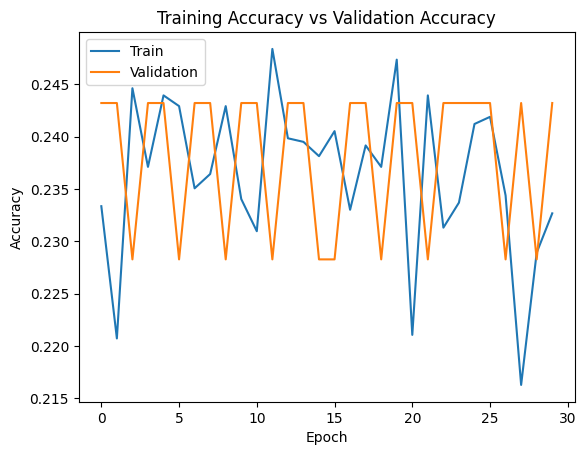

In [65]:
plt.plot(history_model_LeNet.history['accuracy'])
plt.plot(history_model_LeNet.history['val_accuracy'])
plt.title('Training Accuracy vs Validation Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

### Plot Loss

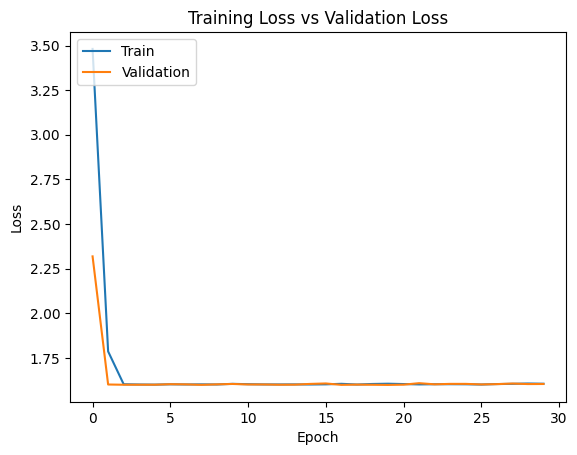

In [66]:
plt.plot(history_model_LeNet.history['loss'])
plt.plot(history_model_LeNet.history['val_loss'])
plt.title('Training Loss vs Validation Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

### Accuracy and Loss

In [67]:
score = model_LeNet.evaluate(test_X, test_Y, verbose=0)
print("Loss: " + str(score[0]))
print("Accuracy: " + str(score[1]*100) + "%")

Loss: 1.6042680740356445
Accuracy: 24.31192696094513%


### Model ResNet

In [68]:
from tensorflow.keras import layers, models
from tensorflow.keras.layers import Input, Conv2D, BatchNormalization, ReLU, Add, Flatten, Dense
from tensorflow.keras.models import Model

# Fungsi untuk residual block
def residual_block(x, filters, kernel_size=3, stride=1):
    shortcut = x  # Shortcut connection

    # Lapisan pertama
    x = Conv2D(filters, kernel_size=kernel_size, strides=stride, padding='same')(x)
    x = BatchNormalization()(x)
    x = ReLU()(x)

    # Lapisan kedua
    x = Conv2D(filters, kernel_size=kernel_size, strides=1, padding='same')(x)
    x = BatchNormalization()(x)

    # Shortcut connection jika dimensi input berbeda
    if stride != 1 or x.shape[-1] != shortcut.shape[-1]:
        shortcut = Conv2D(filters, kernel_size=1, strides=stride, padding='same')(shortcut)
        shortcut = BatchNormalization()(shortcut)

    # Tambahkan shortcut
    x = Add()([x, shortcut])
    x = ReLU()(x)
    return x

# Arsitektur ResNet
input_shape = (124, 124, 3)
num_classes = 5

inputs = Input(shape=input_shape)

# Layer awal
x = Conv2D(64, kernel_size=7, strides=2, padding='same')(inputs)
x = BatchNormalization()(x)
x = ReLU()(x)
x = layers.MaxPooling2D(pool_size=(3, 3), strides=2, padding='same')(x)

# Tambahkan beberapa residual blocks
x = residual_block(x, filters=64)
x = residual_block(x, filters=128, stride=2)
x = residual_block(x, filters=256, stride=2)
x = residual_block(x, filters=512, stride=2)

# Layer fully connected untuk klasifikasi
x = layers.GlobalAveragePooling2D()(x)
x = Dense(84, activation='relu')(x)  # Lapisan tambahan opsional
outputs = Dense(num_classes, activation='softmax')(x)

# Buat model
model_ResNet = Model(inputs, outputs)

# Kompilasi model
model_ResNet.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Ringkasan model
model_ResNet.summary()

Model: "functional_16"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_layer_2       │ (None, 124, 124,  │          0 │ -                 │
│ (InputLayer)        │ 3)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_6 (Conv2D)   │ (None, 62, 62,    │      9,472 │ input_layer_2[0]… │
│                     │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ batch_normalization │ (None, 62, 62,    │        256 │ conv2d_6[0][0]    │
│ (BatchNormalizatio… │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ re_lu (ReLU)        │ (None, 62, 62,    │          0 │ batch_normalizat… │
│                     │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ max_pooling2d       │ (None, 31, 31,    │          0 │ re_lu[0][0]       │
│ (MaxPooling2D)      │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_7 (Conv2D)   │ (None, 31, 31,    │     36,928 │ max_pooling2d[0]… │
│                     │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ batch_normalizatio… │ (None, 31, 31,    │        256 │ conv2d_7[0][0]    │
│ (BatchNormalizatio… │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ re_lu_1 (ReLU)      │ (None, 31, 31,    │          0 │ batch_normalizat… │
│                     │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_8 (Conv2D)   │ (None, 31, 31,    │     36,928 │ re_lu_1[0][0]     │
│                     │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ batch_normalizatio… │ (None, 31, 31,    │        256 │ conv2d_8[0][0]    │
│ (BatchNormalizatio… │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ add (Add)           │ (None, 31, 31,    │          0 │ batch_normalizat… │
│                     │ 64)               │            │ max_pooling2d[0]… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ re_lu_2 (ReLU)      │ (None, 31, 31,    │          0 │ add[0][0]         │
│                     │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_9 (Conv2D)   │ (None, 16, 16,    │     73,856 │ re_lu_2[0][0]     │
│                     │ 128)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ batch_normalizatio… │ (None, 16, 16,    │        512 │ conv2d_9[0][0]    │
│ (BatchNormalizatio… │ 128)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ re_lu_3 (ReLU)      │ (None, 16, 16,    │          0 │ batch_normalizat… │
│                     │ 128)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_10 (Conv2D)  │ (None, 16, 16,    │    147,584 │ re_lu_3[0][0]     │
│                     │ 128)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_11 (Conv2D)  │ (None, 16, 16,    │      8,320 │ re_lu_2[0][0]   

 Total params: 4,957,949 (18.91 MB)

 Trainable params: 4,952,189 (18.89 MB)

 Non-trainable params: 5,760 (22.50 KB)

### History Model ResNet

In [69]:
history_model_ResNet = model_ResNet.fit(
    datagen.flow(train_X, train_Y, batch_size=64),
    epochs=30,
    validation_data=datagen.flow(val_X, val_Y)
)

Epoch 1/30
46/46 ━━━━━━━━━━━━━━━━━━━━ 57s 900ms/step - accuracy: 0.4506 - loss: 1.3388 - val_accuracy: 0.2826 - val_loss: 1.8866
Epoch 2/30
46/46 ━━━━━━━━━━━━━━━━━━━━ 40s 860ms/step - accuracy: 0.6095 - loss: 1.0220 - val_accuracy: 0.2432 - val_loss: 3.8482
Epoch 3/30
46/46 ━━━━━━━━━━━━━━━━━━━━ 38s 818ms/step - accuracy: 0.6607 - loss: 0.8953 - val_accuracy: 0.2432 - val_loss: 2.8957
Epoch 4/30
46/46 ━━━━━━━━━━━━━━━━━━━━ 44s 949ms/step - accuracy: 0.6626 - loss: 0.8814 - val_accuracy: 0.2432 - val_loss: 3.4491
Epoch 5/30
46/46 ━━━━━━━━━━━━━━━━━━━━ 58s 1s/step - accuracy: 0.7045 - loss: 0.7733 - val_accuracy: 0.2188 - val_loss: 3.1687
Epoch 6/30
46/46 ━━━━━━━━━━━━━━━━━━━━ 57s 1s/step - accuracy: 0.6703 - loss: 0.8529 - val_accuracy: 0.3451 - val_loss: 2.1043
Epoch 7/30
46/46 ━━━━━━━━━━━━━━━━━━━━ 57s 1s/step - accuracy: 0.7055 - loss: 0.8107 - val_accuracy: 0.2921 - val_loss: 3.6059
Epoch 8/30
46/46 ━━━━━━━━━━━━━━━━━━━━ 59s 1s/step - accuracy: 0.7190 - loss: 0.7438 - val_accuracy: 0.3981

### Plot Accuracy

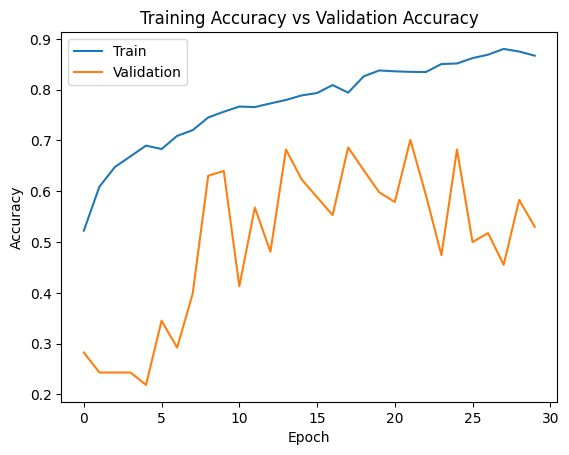

In [70]:
plt.plot(history_model_ResNet.history['accuracy'])
plt.plot(history_model_ResNet.history['val_accuracy'])
plt.title('Training Accuracy vs Validation Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

### Plot Loss

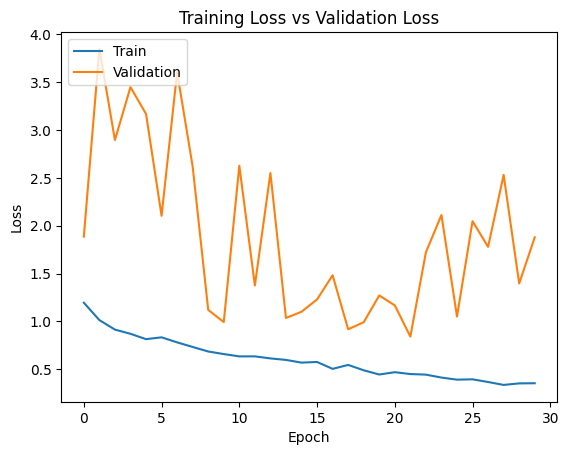

In [71]:
plt.plot(history_model_ResNet.history['loss'])
plt.plot(history_model_ResNet.history['val_loss'])
plt.title('Training Loss vs Validation Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

### Accuracy and Loss

In [72]:
score = model_ResNet.evaluate(test_X, test_Y, verbose=0)
print("Loss: " + str(score[0]))
print("Accuracy: " + str(score[1]*100) + "%")

Loss: 1.5801031589508057
Accuracy: 59.938836097717285%


### Model VGG

In [74]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout

# VGG
model_VGG = Sequential()

# Block 1
model_VGG.add(Conv2D(64, (3, 3), activation='relu', padding='same', input_shape=(124, 124, 3)))
model_VGG.add(Conv2D(64, (3, 3), activation='relu', padding='same'))
model_VGG.add(MaxPooling2D(pool_size=(2, 2), strides=2))

# Block 2
model_VGG.add(Conv2D(128, (3, 3), activation='relu', padding='same'))
model_VGG.add(Conv2D(128, (3, 3), activation='relu', padding='same'))
model_VGG.add(MaxPooling2D(pool_size=(2, 2), strides=2))

# Block 3
model_VGG.add(Conv2D(256, (3, 3), activation='relu', padding='same'))
model_VGG.add(Conv2D(256, (3, 3), activation='relu', padding='same'))
model_VGG.add(MaxPooling2D(pool_size=(2, 2), strides=2))

# Fully Connected Layers
model_VGG.add(Flatten())
model_VGG.add(Dense(256, activation='relu'))  # Ukuran lebih kecil dibanding VGG asli
model_VGG.add(Dropout(0.5))
model_VGG.add(Dense(5, activation='softmax'))  # Output 5 kelas

# Kompilasi model
model_VGG.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Ringkasan model
model_VGG.summary()

Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_24 (Conv2D)              │ (None, 124, 124, 64)   │         1,792 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_25 (Conv2D)              │ (None, 124, 124, 64)   │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_4 (MaxPooling2D)  │ (None, 62, 62, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_26 (Conv2D)              │ (None, 62, 62, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_27 (Conv2D)              │ (None, 62, 62, 128)    │       147,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_5 (MaxPooling2D)  │ (None, 31, 31, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_28 (Conv2D)              │ (None, 31, 31, 256)    │       295,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_29 (Conv2D)              │ (None, 31, 31, 256)    │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_6 (MaxPooling2D)  │ (None, 15, 15, 256)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_3 (Flatten)             │ (None, 57600)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_8 (Dense)                 │ (None, 256)            │    14,745,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_9 (Dense)                 │ (None, 5)              │         1,285 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 15,892,549 (60.63 MB)

 Trainable params: 15,892,549 (60.63 MB)

 Non-trainable params: 0 (0.00 B)

### History Model VGG

In [76]:
history_model_VGG = model_VGG.fit(
    datagen.flow(train_X, train_Y, batch_size=64),
    epochs=30,
    validation_data=datagen.flow(val_X, val_Y)
)

c:\Users\JOHAN\anaconda3\envs\johan\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/30
46/46 ━━━━━━━━━━━━━━━━━━━━ 170s 4s/step - accuracy: 0.3051 - loss: 1.5564 - val_accuracy: 0.3832 - val_loss: 1.4463
Epoch 2/30
46/46 ━━━━━━━━━━━━━━━━━━━━ 158s 3s/step - accuracy: 0.3842 - loss: 1.3960 - val_accuracy: 0.4266 - val_loss: 1.2794
Epoch 3/30
46/46 ━━━━━━━━━━━━━━━━━━━━ 158s 3s/step - accuracy: 0.4458 - loss: 1.2491 - val_accuracy: 0.4429 - val_loss: 1.2491
Epoch 4/30
46/46 ━━━━━━━━━━━━━━━━━━━━ 164s 4s/step - accuracy: 0.5076 - loss: 1.1547 - val_accuracy: 0.5122 - val_loss: 1.1562
Epoch 5/30
46/46 ━━━━━━━━━━━━━━━━━━━━ 185s 4s/step - accuracy: 0.5498 - loss: 1.1271 - val_accuracy: 0.5190 - val_loss: 1.1271
Epoch 6/30
46/46 ━━━━━━━━━━━━━━━━━━━━ 172s 4s/step - accuracy: 0.5549 - loss: 1.0697 - val_accuracy: 0.5489 - val_loss: 1.1120
Epoch 7/30
46/46 ━━━━━━━━━━━━━━━━━━━━ 179s 4s/step - accuracy: 0.5747 - loss: 1.0485 - val_accuracy: 0.5978 - val_loss: 1.0315
Epoch 8/30
46/46 ━━━━━━━━━━━━━━━━━━━━ 174s 4s/step - accuracy: 0.6061 - loss: 1.0012 - val_accuracy: 0.5802 - v

### Plot Accuracy

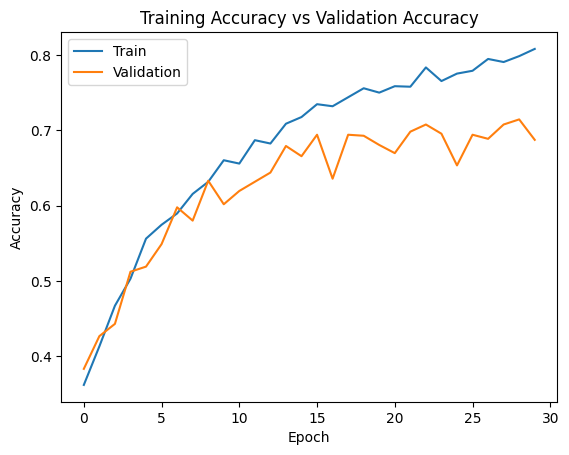

In [77]:
plt.plot(history_model_VGG.history['accuracy'])
plt.plot(history_model_VGG.history['val_accuracy'])
plt.title('Training Accuracy vs Validation Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

### Plot Loss

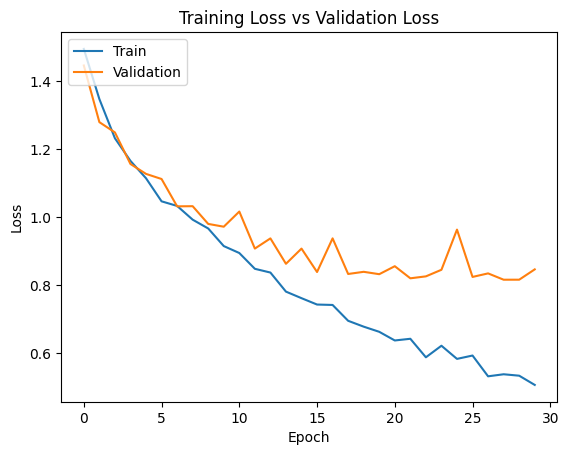

In [78]:
plt.plot(history_model_VGG.history['loss'])
plt.plot(history_model_VGG.history['val_loss'])
plt.title('Training Loss vs Validation Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

### Accuracy and Loss

In [79]:
score = model_VGG.evaluate(test_X, test_Y, verbose=0)
print("Loss: " + str(score[0]))
print("Accuracy: " + str(score[1]*100) + "%")

Loss: 0.6545108556747437
Accuracy: 78.5932719707489%
